# Shazam - Aufgabenblatt 4: Verbesserung des Modells
## Einleitung
Nach Durchführung der drei Schritte auf Aufgabenblatt 3 wurden in der Datenbank zwei Musikstücke gefunden, die auf Basis unseres bisherigen Modells mit eurer Aufnahme zu 100 % übereinstimmen. Da eure Aufnahme in Wirklichkeit jedoch nur zu einem Musikstück gehören kann, deutete ein mehrdeutiges Ergebnis darauf hin, dass unser Modell noch nicht präzise genug ist. Ziel ist es nun, das Modell so zu erweitern, dass die beiden fraglichen Songs unterschieden werden können. Dann ist der Algorithmus in der Lage, das gesuchte Musikstück eindeutig zu identifizieren.
### Schritt 4: Zeitdifferenz betrachten
Da eure Aufnahme nur ein Teilstück eines Liedes ist, stimmen die Zeitachsen von Aufnahme und Musikstück nicht überein. Sie sind um eine Zeitdifferenz  gegeneinander verschoben: Bei den Musikstücken in der Datenbank markiert $t = 0$ immer den Anfang eines Songs. Eure Aufnahme kann aber ein beliebiger Ausschnitt eines Songs sein, sodass dieser Ausschnitt auf der Zeitachse des gesamten Stücks im Allgemeinen nicht bei $t = 0$ beginnt. Startet ihr beispielsweise eine 10 sekündige Aufnahme 40 Sekunden nach Beginn eines Songs, so gehört im Spektrogramm des gesamten Musikstücks der Abschnitt von $t = 40$ bis $t = 50$ zu eurer Aufnahme. In eurer kurzen Aufnahme startet der gleiche Abschnitt jedoch bei $t = 0$ und endet bei $t = 10$. Die Zeitdifferenz  ist in diesem Fall also gegeben durch
$$\Delta t = 40 - 0 = 50 - 10 = 40.$$
Um aus den zwei fraglichen Songs den richtigen zu identifizieren, muss die Verschiebung der Zeitachsen in unser Modell mitaufgenommen werden. Beim zur Aufnahme gehörenden Song, ist die zeitliche Differenz zwischen einem Datenpunkt in der Aufnahme und seinem Pandant im Musikstück für alle Datenpunkte gleich. Dies ist eine wichtige Tatsache, die wir für unser verfeinertes Modell nutzen wollen. 

Zur Berechnung der Zeitdifferenz, vergleichen wir für jede Adresse unserer Aufnahme den Zeitpunkt ihres Anchor Points mit dem Zeitpunkt des Anchor Points, der für dieselbe Adresse im jeweiligen Song gespeichert ist. Diesen Vergleich zwischen den Zeitpunkten der Anchor Points führt auch Shazam für jede Adresse durch.

*Damit dieses Arbeitsblatt funktioniert, musst du als erstes den folgenden Code ausführen. Klicke dazu auf das Code Feld und drücke auf "Run" (oder drücke Shift + Enter).*

In [22]:
# Hier nichts ändern
include("./code/ShazamTests.jl")

 Resolving package versions...


  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


Main.Shazam

## Aufgabe 1a)
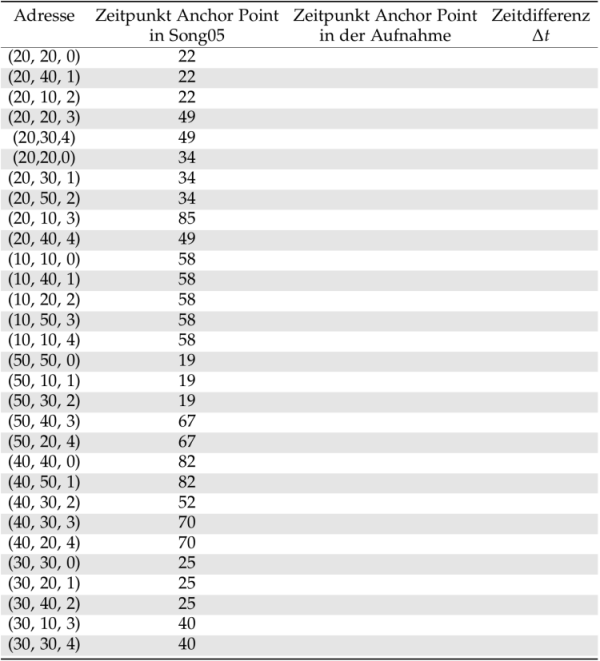
Oben seht ihr eine Tabelle mit 4 Spalten und 30 Zeilen. Die erste Spalte enthält die Adressen (Frequenz Anchor Point, Frequenz Datenpunkt, Zeitdifferenz Anchor Point zu Datenpunkt), die ihr mit Hilfe von Aufgabenblatt 3 erstellt habt, also den Fingerabdruck eurer Aufnahme. Diese Adressen sind auch im Fingerabdruck von `Song05` zu finden. Daher wurde euch `Song05` auch als möglicher Kandidat für den gesuchten Track vorgeschlagen. Die zweite Spalte gibt nun den Zeitpunkt des zur jeweiligen Adresse gehörenden Anchor Points im `Song05` an. Die letzten beiden Spalten sollen von euch ausgefüllt werden. In die dritte Spalte gehört der Zeitpunkt des zur Adresse gehörenden Anchor Points in eurer Aufnahme. Tragt diese Zeitpunkte in Spalte 3 der Tabelle auf eurem Arbeitsblatt ein. Mit den Spalten 2 und 3 kann dann die Zeitdifferenz 

$$\Delta t = \rm{Zeitpunkt \ Anchor \ Point \ im \ Song05 \ - \ Zeitpunkt \ Anchor \ Point \ in \ eurer\ Aufnahme }$$                                                                                                                                
berecht werden. Diese Berechnung wollen wir mit MATLAB durchführen.

*Der folgende Code soll zwei Spaltenvektoren erzeugen, die mit den Spalten 2 und 3 der obigen Tabelle übereinstimmen. Dann soll mit diesen Spaltenvektoren ein Spaltenvektor berechnet werden, der mit Spalte 4 der Tabelle übereinstimmt. Der Vektor zu Spalte 2 ist bereits implementiert. Implementiert analog dazu den Vektor für Spalte 3. Berechnet mit diesen beiden Vektoren dann den Vektor zu Spalte 4. Dieser Vektor kann in die vierte Spalte auf eurem Arbeitsblatt übertragen werden.*

***Ist Song05 der gesuchte Song?***

**Hinweis: Um Spalte 3 richtig auszufüllen, könnt ihr das Spektrogramm auf eurem Arbeitsblatt benutzen oder euch noch einmal den Code von Arbeitsblatt 3 genauer ansehen. Dort sind die gesuchten Zeitpunkte angegeben.**

In [23]:
# Definition von Spalte 2
Spalte2 = [22; 22; 22; 49; 49; 34; 34; 34; 85; 49; 58; 58; 58; 58; 58; 19; 19; 19; 67; 67; 82; 82; 52; 70; 70; 25; 25; 25; 40; 40]; # Dieser Spaltenvektor entspricht Spalte 2

# Definition von Spalte 3
Spalte3 = [1; 1; 1; 1; 1; 4; 4; 4; 4; 4; 7; 7; 7; 7; 7; 10; 10; 10; 10; 10; 13; 13; 13; 13; 13; 16; 16; 16; 16; 16]; # Ersetzt 'NaN' so, dass der Vektor Spalte3 der dritten Spalte obiger Tabelle entspricht (hier könnt ihr analog zu Spalte2 vorgehen)

# Berechnung von Spalte4 mit Spalte2 und Spalte3
Spalte4 = Spalte2 - Spalte3; # Ersetzt 'NaN' durch einen Term, der die Vektoren Spalte2 und Spalte3 nutzt, um die Zeitdifferenz in Spalte 4 zu berechnen

# Ab hier nichts mehr ändern
Shazam.AB4Aufgabe1a(Spalte3,Spalte4)

Spalte4 = [21, 21, 21, 48, 48, 30, 30, 30, 81, 45, 51, 51, 51, 51, 51, 9, 9, 9, 57, 57, 69, 69, 39, 57, 57, 9, 9, 9, 24, 24]

## Aufgabe 1b)
Nachdem wir in Aufgabenteil a) den `Song05` genauer untersucht haben, wollen wir die gleiche Analyse nun mit `Song02` durchführen. Hier ist die zu `Song02` gehörende Tabelle:
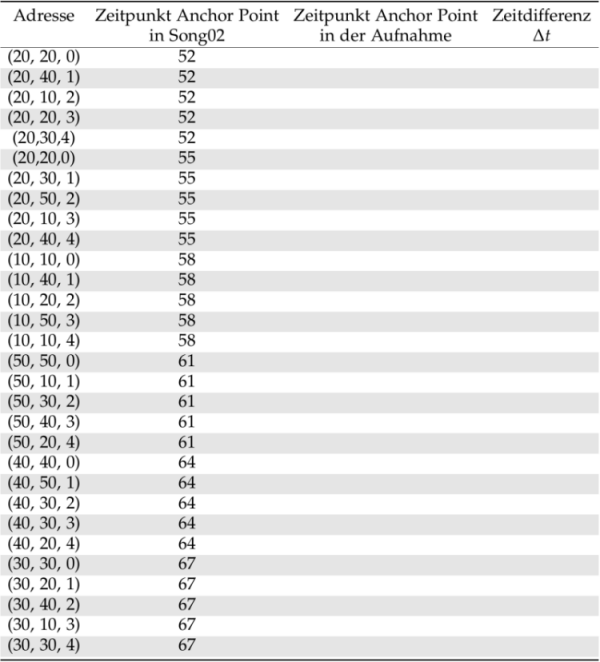
*Geht im folgenden Code genauso vor, wie in Aufgabenteil a). Hier müsst ihr jedoch zusätzlich den Vektor Spalte2 definieren, welcher der zweiten Spalte obiger Tabelle entsprechen soll. Klickt anschließend auf den "Run" und übertragt das Ergebnis aufs Arbeitsblatt*

***Ist Song02 der gesuchte Song?***

In [24]:
# Definition von Spalte2
Spalte2 = [52; 52; 52; 52; 52; 55; 55; 55; 55; 55; 58; 58; 58; 58; 58; 61; 61; 61; 61; 61; 64; 64; 64; 64; 64; 67; 67; 67; 67; 67]; # Ersetzt 'NaN' so, dass der Vektor Spalte2 der zweiten Spalte obiger Tabelle entspricht (hier könnt ihr analog zu Teil a) vorgehen)

# Definition von Spalte3
Spalte3 = [1; 1; 1; 1; 1; 4; 4; 4; 4; 4; 7; 7; 7; 7; 7; 10; 10; 10; 10; 10; 13; 13; 13; 13; 13; 16; 16; 16; 16; 16] # Ersetzt 'NaN' so, dass der Vektor Spalte3 der dritten Spalte obiger Tabelle entspricht 

# Berechnung von Spalte4 mit Spalte2 und Spalte3
Spalte4 = Spalte2 - Spalte3 # Ersetzt NaN durch einen Term, der die Vektoren Spalte2 und Spalte3 nutzt, um die Zeitdifferenz in Spalte 4 zu berechnen

# Ab hier nichts mehr ändern
Shazam.AB4Aufgabe1b(Spalte2,Spalte3,Spalte4)

Spalte4 = [51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51]

## Aufgabe 1c)
Zu welchem Song gehört euer Ausschnitt nun, zu Song02 oder Song05?

*Ersetzt im folgenden Code `NaN` durch die Nummer (02 oder 05) des Songs, aus dem euere Aufnahme stammt. Klickt danach auf "Run", um euer Angabe zu überprüfen.* 

In [30]:
Nummer_des_gesuchten_Songs = 02; # Ersetzt 'NaN' durch die Nummer (02 oder 05) des Songs, aus dem eure Aufnahme stammt

# Ab hier nichts mehr ändern
Shazam.AB4Aufgabe1c(Nummer_des_gesuchten_Songs)

Richtig, Song02 ist der gesuchte Song!

## Aufgabe 2)
### Modellanwendung | Audiosignale der andren Gruppen bestimmen
Zum Schluss werden wir das verbesserte Modell mit den Audiosignalen testen, die wir am Ende von Aufgabenblatt 1 selber erstellt haben. Dazu sollt ihr für 3 Audiosignale aus unserer Datenbank Songtitel und Interpreten bestimmen.

*Ladet euch den Ordner `DataBase` aus der Dropbox herunter und fügt ihn dem Ordner `Arbeitsblatt 3 & 4` hinzu. Nun gebt ihr im folgenden Code die Nummer der Gruppe ein, dessen Audiosignal ihr in der Datenbank suchen möchtet. Klickt anschließend auf "Run". Es wird der Song der ausgewählten Gruppe angezeigt.*

*Notiert euch zu drei beliebigen Gruppen die Gruppennummer, den Songtitel und den Interpreten.*

In [ ]:
# Hier benötigen wir den Server
Fremde_Gruppennummer = NaN; # Ersetzt 'NaN' durch die Nummer der Gruppe, deren Audiosignal ihr in der Datenbank suchen möchtet
Ton_Suchen(Fremde_Gruppennummer);